In [6]:
# From: https://github.com/ResidentMario/missingno
import missingno as msno
%matplotlib inline
import pandas as pd
import numpy as np

In [8]:
collisions=pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')

/Users/whitneyreiner/anaconda3/envs/insight/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Matrix
Docs description: The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

*** If data isn't technically missing (from the computer's perspective) but IS missing in reality (e.g., it is filled in with a "?" or something else that Pandas did not know to interpret as NaN), missingno is not helpful.
You still need to make sure all the NaNs are read and interpreted as NaNs.


** White= missing, black = not missing

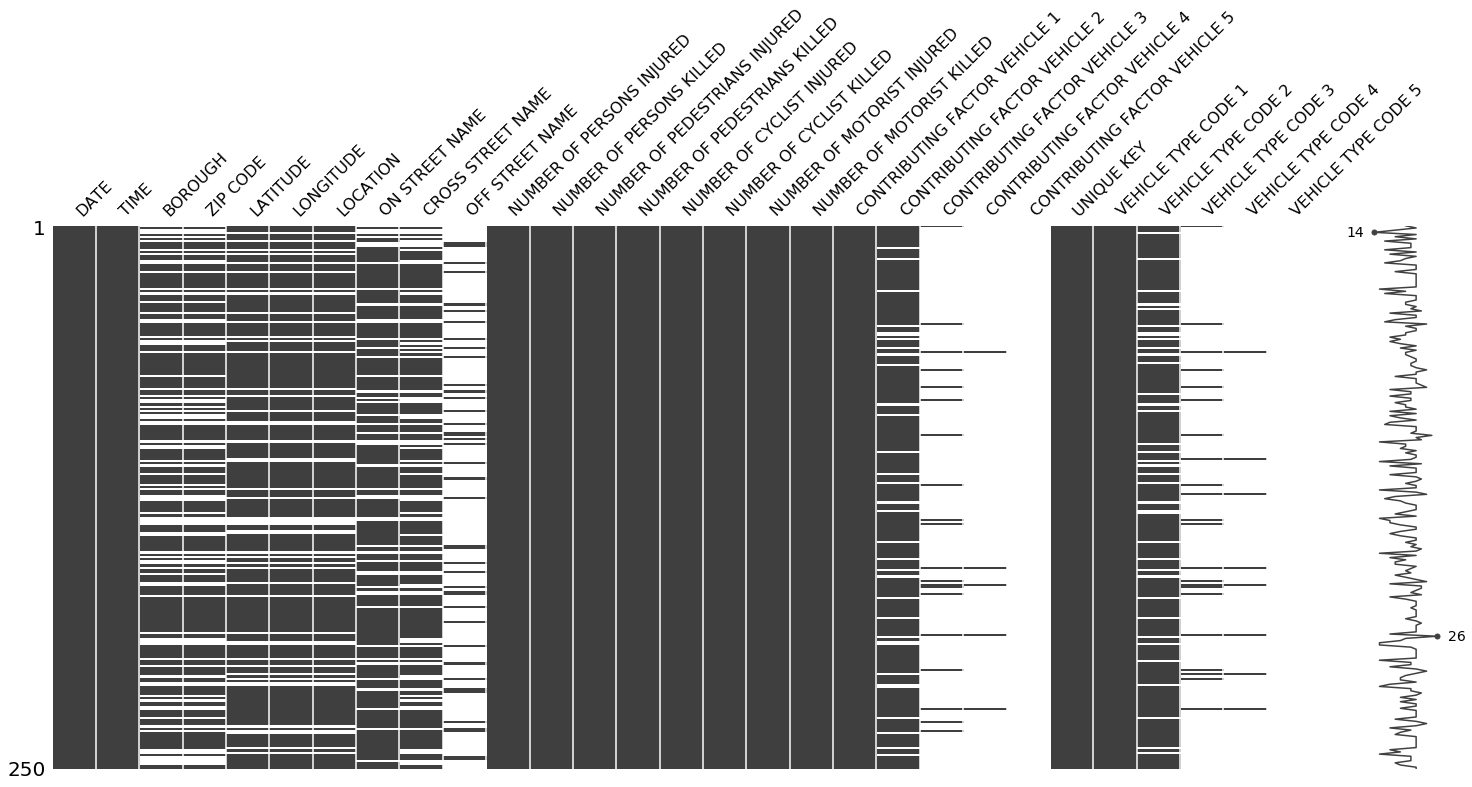

In [9]:
msno.matrix(collisions.sample(250))

From the docs:
At a glance, date, time, the distribution of injuries, and the contribution factor of the first vehicle appear to be completely populated, while geographic information seems mostly complete, but spottier.

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

If you are working with time-series data, you can specify a periodicity using the freq keyword parameter:

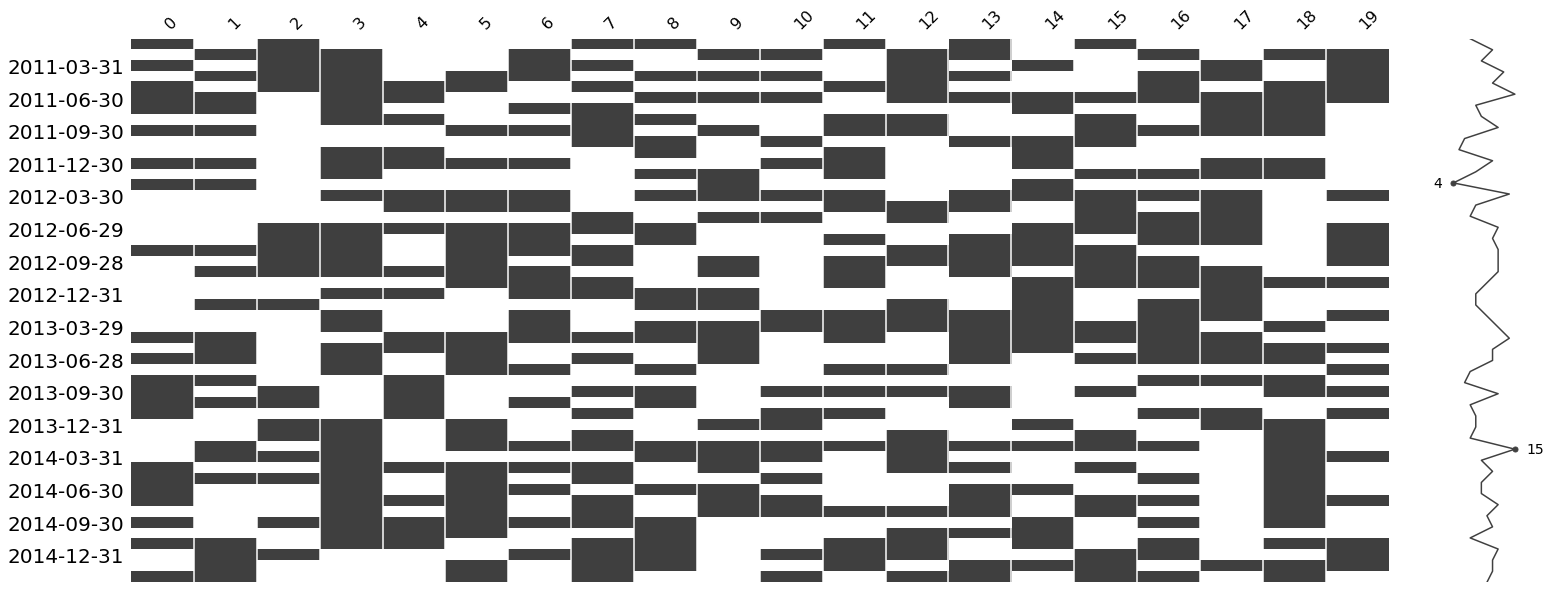

In [10]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)
null_pattern = pd.DataFrame(null_pattern).replace({False: None})
msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

From the docs.:

Bar provides the same information as matrix, but in a simpler format.

You can switch to a logarithmic scale by specifying log=True.


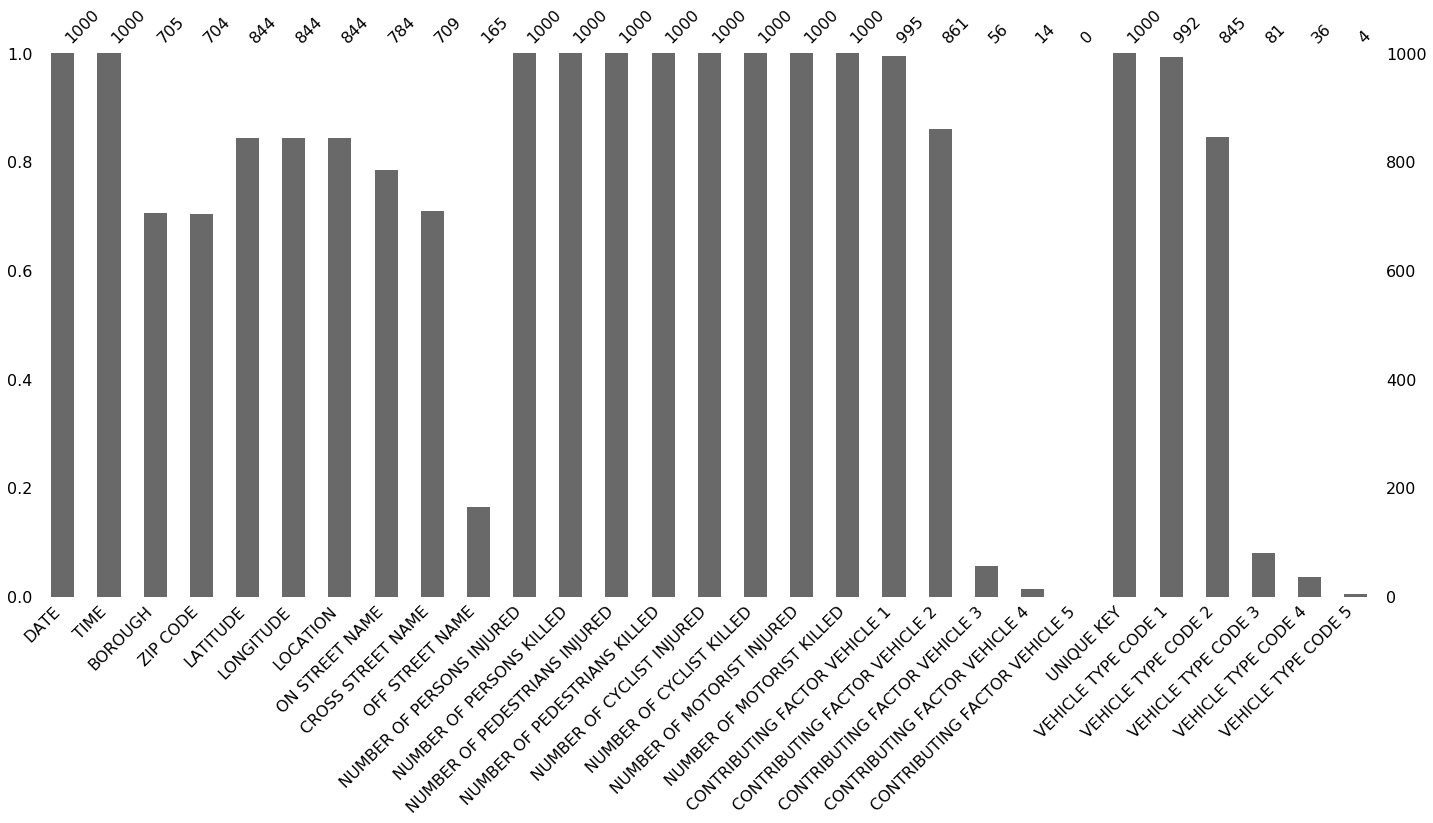

In [13]:
# How many nulls per column?
msno.bar(collisions.sample(1000))

From the docs.:

Heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

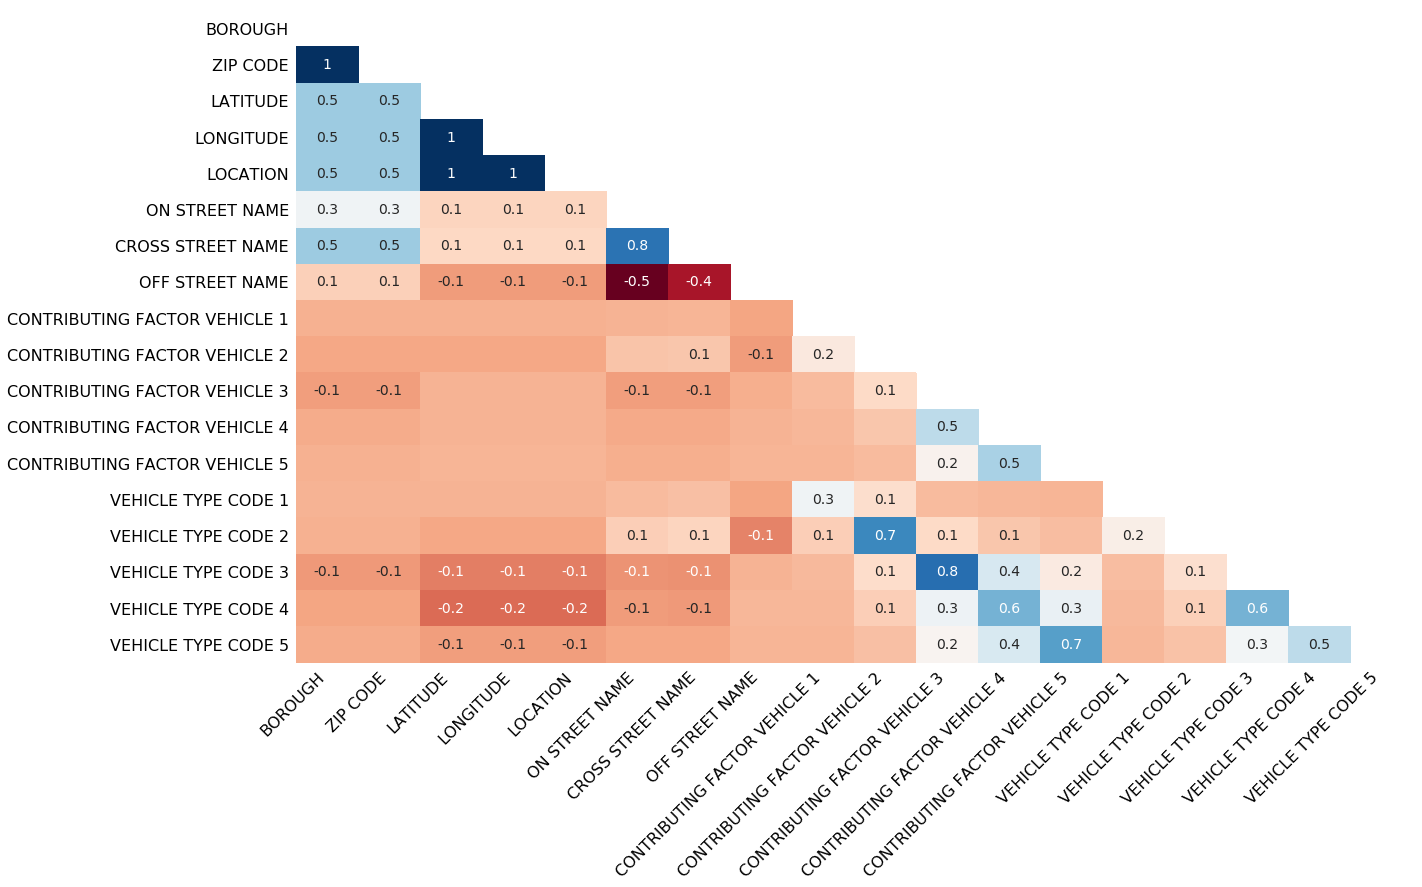

In [14]:
msno.heatmap(collisions)

From the docs.:

In this example, it seems that reports which are filed with an OFF STREET NAME variable are less likely to have complete geographic data.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For example, in this dataset the correlation between VEHICLE CODE TYPE 3 and CONTRIBUTING FACTOR VEHICLE 3 is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.
________________________________________

Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

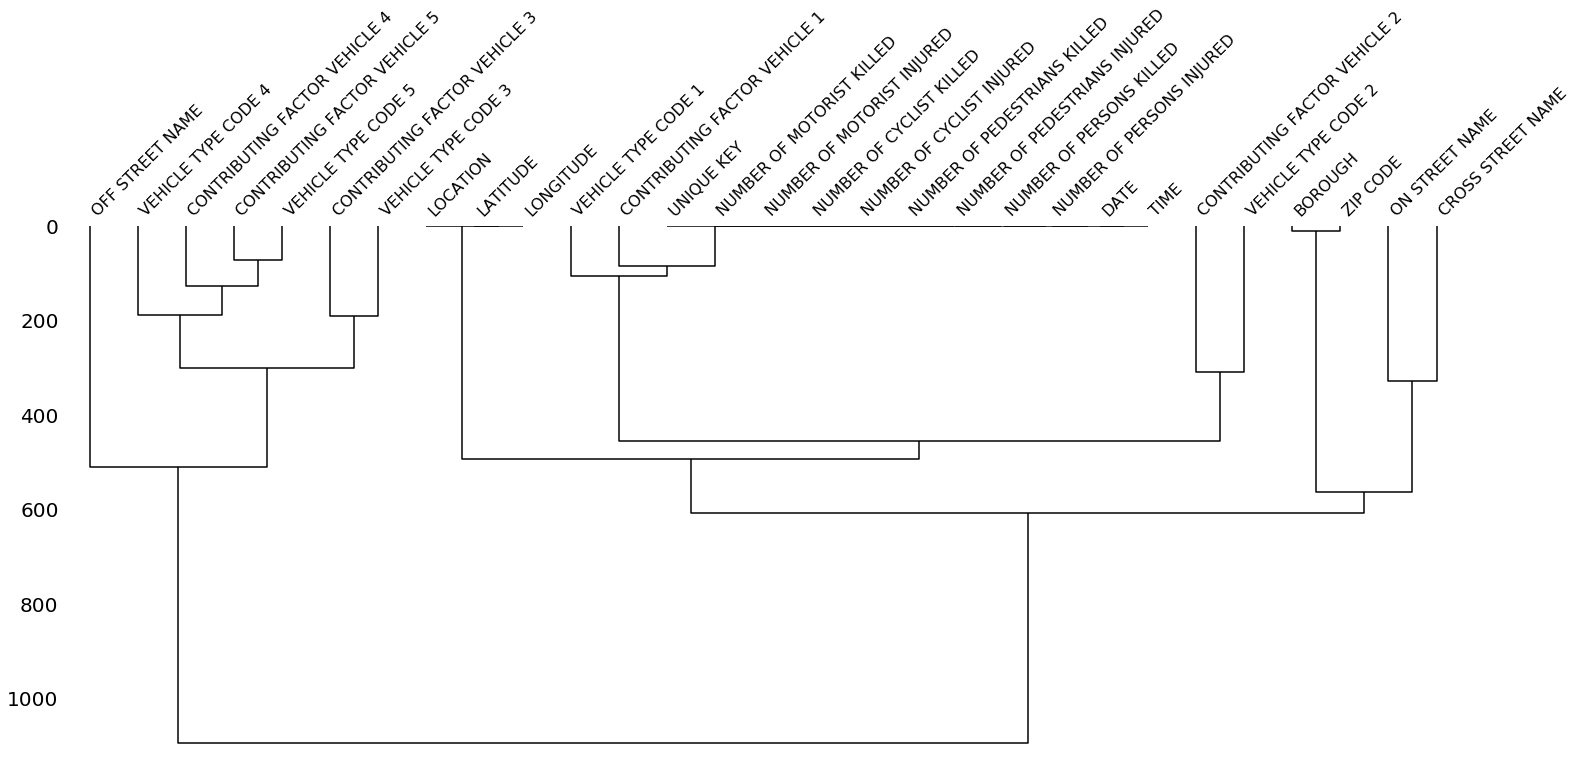

In [15]:
msno.dendrogram(collisions)

From the docs.:

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity (for example, as CONTRIBUTING FACTOR VEHICLE 2 and VEHICLE TYPE CODE 2 ought to), then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.